# Setup Libraries

Needed in google colab

In [1]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 12.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
#import matplotlib.mlab as mlab 
%matplotlib inline

# statistical calculation
#from scipy.stats import norm

import datetime as dt # For defining dates

import time

import yfinance as yf

# Get Stock Data

In [3]:
all_stocks = ["^GSPC", "^FTLC", "^RUT", "IEUS", "GOVT", "IGOV", "SIVR", "SGOL"]

In [4]:
def get_all_closes_of_stocks(tickers):
  i = 0
  stock_list = pd.DataFrame()
  for ticker in tickers:
    stock = yf.Ticker(ticker)        
    data = stock.history(start="2012-02-24",end ="2022-02-25")
    data.drop(data.columns[[0,1,2,4,5,6]], axis=1, inplace=True) # Just gets the adjacent close for each asset
    data.columns = [ticker]
    stock_list[ticker] = data.iloc[:,0]
  return stock_list.dropna()
stock_data = get_all_closes_of_stocks(all_stocks)
print(stock_data)

                  ^GSPC        ^FTLC         ^RUT       IEUS       GOVT  \
Date                                                                      
2012-02-24  1365.739990  3144.399902   826.919983  27.285177  21.551918   
2012-02-27  1367.589966  3133.399902   826.659973  27.201174  21.551918   
2012-02-28  1372.180054  3141.199951   823.799988  27.445541  21.551918   
2012-02-29  1365.680054  3112.399902   810.940002  27.155359  21.551918   
2012-03-01  1374.089966  3142.899902   815.219971  27.117167  21.551918   
...                 ...          ...          ...        ...        ...   
2022-02-17  4380.259766  4240.200195  2028.089966  63.590000  25.511515   
2022-02-18  4348.870117  4222.799805  2009.329956  62.840000  25.571404   
2022-02-22  4304.759766  4201.799805  1980.170044  61.560001  25.581383   
2022-02-23  4225.500000  4198.799805  1944.089966  60.889999  25.461611   
2022-02-24  4288.700195  4042.899902  1996.010010  60.000000  25.471592   

                 IGOV   

# Hidden Markov Model

## Setup libaries

In [109]:
pip install hmmlearn

In [110]:
import itertools
from tqdm import tqdm
from hmmlearn.hmm import MultinomialHMM
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import r2_score

## Model setup

In [111]:
stock = yf.Ticker("^GSPC")
data = stock.history(start="2012-02-24",end="2022-02-25")
test_data = data.iloc[-252:]
data = data.iloc[:-252]

In [112]:
data.drop(data.columns[[4,5,6]], axis=1, inplace=True)
data

,Open,High,Low,Close
Date,,,,
2012-02-24,1363.459961,1368.920044,1363.459961,1365.739990
2012-02-27,1365.199951,1371.939941,1354.920044,1367.589966
2012-02-28,1367.560059,1373.089966,1365.969971,1372.180054
2012-02-29,1372.199951,1378.040039,1363.810059,1365.680054
2012-03-01,1365.900024,1376.170044,1365.900024,1374.089966
...,...,...,...,...
2021-02-19,3921.159912,3930.409912,3903.070068,3906.709961
2021-02-22,3885.550049,3902.919922,3874.709961,3876.500000
2021-02-23,3857.070068,3895.979980,3805.590088,3881.370117


In [113]:
daily_stock_data = data.pct_change().dropna()

In [114]:
daily_stock_data.shape

(2265, 4)

## Make Predictions for Individual Stocks

In [115]:
test_dates = training_data = stock_data.iloc[(-253):, 0:1].pct_change().dropna()

In [116]:
test_dates

,^GSPC
Date,
2021-02-04,0.010853
2021-02-05,0.003897
2021-02-08,0.007399
2021-02-09,-0.001114
2021-02-10,-0.000345
...,...
2022-02-17,-0.021173
2022-02-18,-0.007166
2022-02-22,-0.010143


In [117]:
training_data = stock_data.iloc[:-252].pct_change().dropna()

In [118]:
training_data

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
Date,,,,,,,,
2012-02-27,0.001355,-0.003498,-0.000314,-0.003079,0.000000,-0.001189,-0.000285,-0.003132
2012-02-28,0.003356,0.002489,-0.003460,0.008984,0.000000,0.007836,0.043020,0.010512
2012-02-29,-0.004737,-0.009168,-0.015611,-0.010573,0.000000,-0.004921,-0.064736,-0.053030
2012-03-01,0.006158,0.009800,0.005278,-0.001406,0.000000,-0.019891,0.027453,0.014149
2012-03-02,-0.003246,-0.002895,-0.015701,-0.002253,0.000000,-0.007479,-0.020182,-0.001766
...,...,...,...,...,...,...,...,...
2021-01-27,-0.025678,-0.012199,-0.019146,-0.026092,0.001104,-0.003997,-0.009756,-0.006180
2021-01-29,-0.009739,-0.020476,-0.016626,0.003389,-0.003308,-0.001277,0.066092,0.000565
2021-02-01,0.016052,0.009006,0.025327,0.012064,0.000775,-0.006210,0.072006,0.008475


In [119]:
days = np.array(test_dates.reset_index()['Date'], dtype="datetime64[ms]")
days

array(['2021-02-04T00:00:00.000', '2021-02-05T00:00:00.000',
       '2021-02-08T00:00:00.000', '2021-02-09T00:00:00.000',
       '2021-02-10T00:00:00.000', '2021-02-11T00:00:00.000',
       '2021-02-12T00:00:00.000', '2021-02-16T00:00:00.000',
       '2021-02-18T00:00:00.000', '2021-02-19T00:00:00.000',
       '2021-02-22T00:00:00.000', '2021-02-23T00:00:00.000',
       '2021-02-24T00:00:00.000', '2021-02-25T00:00:00.000',
       '2021-02-26T00:00:00.000', '2021-03-01T00:00:00.000',
       '2021-03-02T00:00:00.000', '2021-03-04T00:00:00.000',
       '2021-03-05T00:00:00.000', '2021-03-08T00:00:00.000',
       '2021-03-09T00:00:00.000', '2021-03-10T00:00:00.000',
       '2021-03-11T00:00:00.000', '2021-03-15T00:00:00.000',
       '2021-03-16T00:00:00.000', '2021-03-17T00:00:00.000',
       '2021-03-18T00:00:00.000', '2021-03-19T00:00:00.000',
       '2021-03-22T00:00:00.000', '2021-03-23T00:00:00.000',
       '2021-03-24T00:00:00.000', '2021-03-25T00:00:00.000',
       '2021-03-26T00:00

In [120]:
all_samples = []
for close in training_data:
  print(close)
  hmm = GaussianHMM(n_components=4)
  #print(pd.DataFrame(training_data[close]))
  hmm.fit(pd.DataFrame(training_data[close]))
  samples, _ = hmm.sample(252)
  if len(all_samples)==0:
    test_dates[close] = samples
    all_samples = pd.DataFrame( test_dates[close], index=days)
  else:
    all_samples[close] = samples
print(all_samples)

^GSPC
^FTLC
^RUT
IEUS
GOVT
IGOV
SIVR
SGOL
               ^GSPC     ^FTLC      ^RUT      IEUS      GOVT      IGOV  \
2021-02-04 -0.001578 -0.001360  0.017138  0.015894  0.007798 -0.005997   
2021-02-05 -0.004707  0.037176  0.007884  0.006166  0.003688  0.004442   
2021-02-08  0.003166  0.014966 -0.012143 -0.001056  0.005843 -0.007122   
2021-02-09  0.014873 -0.009482  0.017960 -0.003851  0.003103 -0.001400   
2021-02-10 -0.002696  0.017818  0.010387 -0.005299  0.012451 -0.002845   
...              ...       ...       ...       ...       ...       ...   
2022-02-17  0.030016  0.014652 -0.014008  0.004423  0.001239  0.006041   
2022-02-18 -0.001812 -0.006702  0.008590  0.008131 -0.000883 -0.001588   
2022-02-22  0.002876  0.013380  0.003978 -0.004112 -0.001563  0.000487   
2022-02-23 -0.009926 -0.000439 -0.006889 -0.000422  0.006944 -0.011683   
2022-02-24  0.009878  0.002502 -0.002849  0.015577 -0.002841 -0.001526   

                SIVR      SGOL  
2021-02-04  0.020844  0.002289  
202

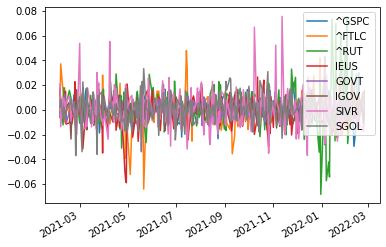

In [121]:
all_samples.plot()

## Calculating the resulting stock price change using cumilative product

In [122]:
stock_data.iloc[-253:-252,:] #Gets the stock prices for the last day of the training data

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
Date,,,,,,,,
2021-02-03,3830.169922,3728.5,2159.699951,62.261761,26.677721,54.029949,25.92,17.620001


In [123]:
all_samples

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
2021-02-04,-0.001578,-0.001360,0.017138,0.015894,0.007798,-0.005997,0.020844,0.002289
2021-02-05,-0.004707,0.037176,0.007884,0.006166,0.003688,0.004442,-0.013574,0.008465
2021-02-08,0.003166,0.014966,-0.012143,-0.001056,0.005843,-0.007122,0.009870,-0.006863
2021-02-09,0.014873,-0.009482,0.017960,-0.003851,0.003103,-0.001400,0.009135,0.001773
2021-02-10,-0.002696,0.017818,0.010387,-0.005299,0.012451,-0.002845,0.004611,-0.007899
...,...,...,...,...,...,...,...,...
2022-02-17,0.030016,0.014652,-0.014008,0.004423,0.001239,0.006041,0.008861,-0.007981
2022-02-18,-0.001812,-0.006702,0.008590,0.008131,-0.000883,-0.001588,-0.013406,-0.004677
2022-02-22,0.002876,0.013380,0.003978,-0.004112,-0.001563,0.000487,-0.013571,0.014081
2022-02-23,-0.009926,-0.000439,-0.006889,-0.000422,0.006944,-0.011683,-0.017893,0.006718


In [124]:
plus_samples = 1 +all_samples

In [125]:
plus_samples.iloc[0:1,:].reset_index()
plus_samples

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
2021-02-04,0.998422,0.998640,1.017138,1.015894,1.007798,0.994003,1.020844,1.002289
2021-02-05,0.995293,1.037176,1.007884,1.006166,1.003688,1.004442,0.986426,1.008465
2021-02-08,1.003166,1.014966,0.987857,0.998944,1.005843,0.992878,1.009870,0.993137
2021-02-09,1.014873,0.990518,1.017960,0.996149,1.003103,0.998600,1.009135,1.001773
2021-02-10,0.997304,1.017818,1.010387,0.994701,1.012451,0.997155,1.004611,0.992101
...,...,...,...,...,...,...,...,...
2022-02-17,1.030016,1.014652,0.985992,1.004423,1.001239,1.006041,1.008861,0.992019
2022-02-18,0.998188,0.993298,1.008590,1.008131,0.999117,0.998412,0.986594,0.995323
2022-02-22,1.002876,1.013380,1.003978,0.995888,0.998437,1.000487,0.986429,1.014081
2022-02-23,0.990074,0.999561,0.993111,0.999578,1.006944,0.988317,0.982107,1.006718


In [126]:
last_stock_price = stock_data.iloc[-253:-252,:].reset_index().drop("Date", axis=1)
last_stock_price

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
0,3830.169922,3728.5,2159.699951,62.261761,26.677721,54.029949,25.92,17.620001


In [127]:
Cumulative_returns_daily = (plus_samples).cumprod().dropna()
print(Cumulative_returns_daily.dropna())
#print(plus_samples.cumprod())

               ^GSPC     ^FTLC      ^RUT      IEUS      GOVT      IGOV  \
2021-02-04  0.998422  0.998640  1.017138  1.015894  1.007798  0.994003   
2021-02-05  0.993723  1.035765  1.025157  1.022158  1.011514  0.998419   
2021-02-08  0.996869  1.051266  1.012708  1.021078  1.017424  0.991309   
2021-02-09  1.011695  1.041299  1.030896  1.017147  1.020581  0.989921   
2021-02-10  1.008968  1.059852  1.041604  1.011757  1.033288  0.987105   
...              ...       ...       ...       ...       ...       ...   
2022-02-17  1.209081  0.940732  1.541599  0.671298  1.117802  0.983059   
2022-02-18  1.206891  0.934428  1.554842  0.676756  1.116815  0.981498   
2022-02-22  1.210362  0.946931  1.561027  0.673973  1.115069  0.981976   
2022-02-23  1.198348  0.946515  1.550274  0.673689  1.122812  0.970503   
2022-02-24  1.210185  0.948883  1.545857  0.684183  1.119622  0.969022   

                SIVR      SGOL  
2021-02-04  1.020844  1.002289  
2021-02-05  1.006988  1.010774  
2021-02-08  

In [128]:
last_stock_price

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
0,3830.169922,3728.5,2159.699951,62.261761,26.677721,54.029949,25.92,17.620001


In [129]:
stock_prices = Cumulative_returns_daily * last_stock_price.iloc[0,:]
stock_prices

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
2021-02-04,3824.127488,3723.428777,2196.711831,63.251350,26.885743,53.705952,26.460287,17.660335
2021-02-05,3806.128883,3861.849641,2214.030477,63.641328,26.984887,53.944534,26.101125,17.809830
2021-02-08,3818.177618,3919.646375,2187.146358,63.574131,27.142548,53.560359,26.358747,17.687595
2021-02-09,3874.965639,3882.481825,2226.426905,63.329337,27.226777,53.485383,26.599522,17.718958
2021-02-10,3864.518982,3951.659788,2249.552986,62.993741,27.565780,53.333226,26.722185,17.578989
...,...,...,...,...,...,...,...,...
2022-02-17,4630.987242,3507.520838,3329.392317,41.796187,29.820410,53.114635,28.091689,21.056808
2022-02-18,4622.595845,3484.014478,3357.991944,42.136039,29.794072,53.030275,27.715084,20.958321
2022-02-22,4635.891478,3530.630416,3371.350441,41.962768,29.747499,53.056094,27.338955,21.253425
2022-02-23,4589.875923,3529.081569,3348.125726,41.945050,29.954070,52.436217,26.849770,21.396216


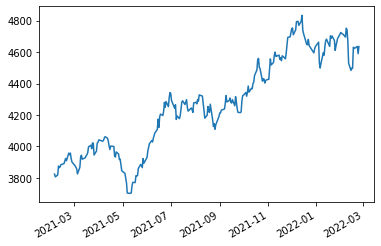

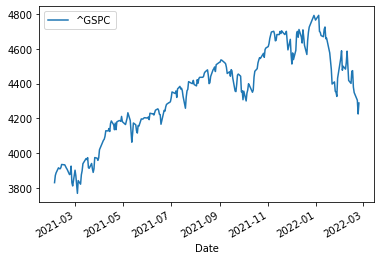

In [130]:
stock_prices["^GSPC"].plot()
stock_data.iloc[-253:,0:1].plot()

## Calculating stock price individually for plotting purposes

[0.00846504]
4149.213922624784
-0.8711675719712948


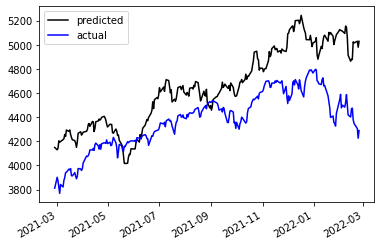

In [131]:
open_price = test_data.iloc[-1,0]
#print(last_close_value)
print(samples[1,:])
print(open_price * (1 + all_samples.iloc[0,0])) # =closing value
closing_samples = []
closing_samples = np.array(closing_samples)
i = 0
for sample in all_samples.iloc[:,0]:
  if i == 0:
    closing_samples = np.append(closing_samples, (open_price * (1 + sample)))
  else:
    closing_samples = np.append(closing_samples, (closing_samples[i-1] * (1 + sample)))
  i += 1
days = np.array(test_data.reset_index()['Date'], dtype="datetime64[ms]")
print(r2_score(test_data["Close"],closing_samples))
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(days, closing_samples, c="black", label="predicted")
axes.plot(days, test_data["Close"], c="blue", label="actual")
fig.autofmt_xdate()
plt.legend()
plt.show()

# Creating the Mean-Variance Portfolio Using the HMM Prediction

# Calculate Efiicient Frontier using pypfopt

In [132]:
pip install PyPortfolioOpt

In [133]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


mu = mean_historical_return(stock_prices)
S = CovarianceShrinkage(stock_prices).ledoit_wolf()

from pypfopt.efficient_frontier import EfficientFrontier 

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() # This gets rid of most of the assets

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))
ef.portfolio_performance(verbose=True)

{'^GSPC': 0.28387, '^FTLC': 0.0, '^RUT': 0.23372, 'IEUS': 0.0, 'GOVT': 0.27431, 'IGOV': 0.0, 'SIVR': 0.0, 'SGOL': 0.2081}
Expected annual return: 26.0%
Annual volatility: 8.7%
Sharpe Ratio: 2.74


(0.25966882153884235, 0.08741248416676588, 2.741814556849812)

## Format the Weights for Further Use

In [134]:
print(dict(cleaned_weights))

{'^GSPC': 0.28387, '^FTLC': 0.0, '^RUT': 0.23372, 'IEUS': 0.0, 'GOVT': 0.27431, 'IGOV': 0.0, 'SIVR': 0.0, 'SGOL': 0.2081}


In [135]:
tmp_list = []
for value, key in dict(cleaned_weights).items():
  tmp_list.append(key)

portfolio_weights = pd.Series(tmp_list, index=all_stocks)
portfolio_weights

^GSPC    0.28387
^FTLC    0.00000
^RUT     0.23372
IEUS     0.00000
GOVT     0.27431
IGOV     0.00000
SIVR     0.00000
SGOL     0.20810
dtype: float64

# Test Year

In [136]:
initial_investment = 10000 # 10'000 dollar invesment. Can Change to 100'000 later 
trading_year = 252 # Number of trading days in a year
stock_returns = stock_data.pct_change() 

In [137]:
weighted_portfolio = portfolio_weights * initial_investment # Calculate the dollars invested in each asset in the portfolio
num_of_shares = weighted_portfolio / stock_data.iloc[(-trading_year),:] # Calculate the number of shares owned of each asset in the portfolio
portfolio_test_values = num_of_shares * stock_data.iloc[(-trading_year):,:] # share * share price = position value and it is done for each day in the trading year for all assets
portfolio_test_values['Total'] = portfolio_test_values.sum(axis=1)
portfolio_test_values 

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL,Total
Date,,,,,,,,,
2021-02-04,2838.700000,0.0,2337.200000,0.0,2743.100000,0.0,0.0,2081.000000,10000.000000
2021-02-05,2849.763820,0.0,2370.001745,0.0,2739.031800,0.0,0.0,2101.520311,10060.317676
2021-02-08,2870.850215,0.0,2429.884983,0.0,2740.049046,0.0,0.0,2122.040622,10162.824866
2021-02-09,2867.653451,0.0,2439.690427,0.0,2742.083146,0.0,0.0,2128.075913,10177.502938
2021-02-10,2866.663581,0.0,2422.116953,0.0,2747.168985,0.0,0.0,2136.525642,10172.475162
...,...,...,...,...,...,...,...,...,...
2022-02-17,3211.538850,0.0,2152.201686,0.0,2625.131614,0.0,0.0,2199.293450,10188.165600
2022-02-18,3188.524445,0.0,2132.293631,0.0,2631.294168,0.0,0.0,2196.879472,10148.991716
2022-02-22,3156.183416,0.0,2101.349239,0.0,2632.321031,0.0,0.0,2201.707658,10091.561344


### Plot the portfolio

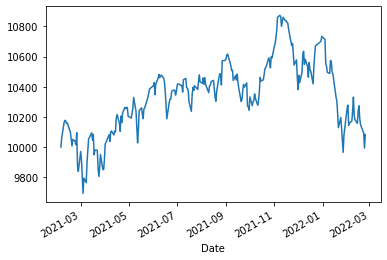

In [138]:
portfolio_test_values['Total'].plot() # Need to pretty this up for the dssertation or not use it at all

### Plot the Individual Assets

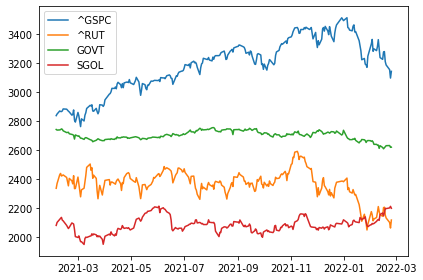

In [159]:
# Plotted on the same graph to see general trend
figure = plt.figure()
axis = plt.plot(portfolio_test_values.iloc[:,0:1], label='^GSPC')
#axis = plt.plot(portfolio_test_values.iloc[:,1:2], label='^FTLC')
axis = plt.plot(portfolio_test_values.iloc[:,2:3], label='^RUT')
#axis = plt.plot(portfolio_test_values.iloc[:,3:4], label='IEUS')

axis = plt.plot(portfolio_test_values.iloc[:,4:5], label='GOVT')
#axis = plt.plot(portfolio_test_values.iloc[:,5:6], label='IGOV')
#axis = plt.plot(portfolio_test_values.iloc[:,6:7], label='SIVR')
axis = plt.plot(portfolio_test_values.iloc[:,7:8], label='SGOL')
plt.tight_layout()
plt.legend()
plt.show()

# Analyse the Test Year

## Sharpe Ratio

^GSPC    0.706807
^RUT    -0.354477
GOVT    -1.019086
SGOL     0.411152
Total    0.033882
dtype: float64

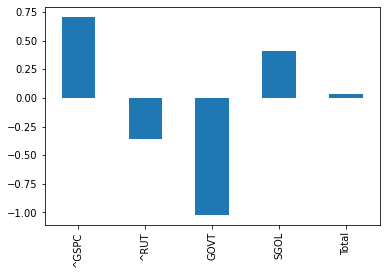

In [147]:
#daily_stock_returns = portfolio_position_values.pct_change().dropna() # Analysing holding such portfolio position from the start
daily_stock_returns = portfolio_test_values.pct_change()
daily_stock_returns.drop(daily_stock_returns.columns[[1,3,5,6]], axis=1, inplace=True)
daily_stock_returns = daily_stock_returns.dropna()
#print(daily_stock_returns)
# To calculate sharpie ratio for individual stocks 
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 252 #252 trading days in a year
rf =0.01 #1% risk free rate Will need to update this to the US treasury field or something
#The risk-free rate could be a U.S. Treasury rate or yield, such as the one-year or two-year Treasury yield.
sharpes = daily_stock_returns.apply(sharpe_ratio, args=(N,rf,),axis=0)
sharpes.plot.bar()
sharpes

## Volatility

### Individual Stock Volatility

#### Rolling Volatilty for Each stock

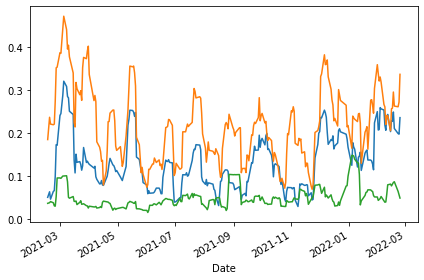

In [152]:
#data = portfolio_position_values.pct_change().dropna() # Analysing holding such portfolio position from the start
rolling_stock = pd.DataFrame()
daily_stock_returns = portfolio_test_values.pct_change()
daily_stock_returns.drop(daily_stock_returns.columns[[1,3,5,6]], axis=1, inplace=True)
data = daily_stock_returns.dropna()
#print(data)
for stock in ["^GSPC","^RUT","GOVT","SGOL", "Total"]:
  rolling_stock[stock] = data[stock].rolling(7).std()*(252**0.5)
f1 = plt.figure()
for i in range(0,3):
  rolling_stock.iloc[:,i].plot()
  plt.tight_layout()
  #plt.show() # To display in separate graphs instead of 1

#### Anualised volatility for Each Stock

In [154]:
#data = portfolio_position_values.pct_change().dropna() # Analysing holding such portfolio position from the start
stock_volatility = pd.DataFrame()
daily_stock_returns = portfolio_test_values.pct_change()
daily_stock_returns.drop(daily_stock_returns.columns[[1,3,5,6]], axis=1, inplace=True)
data = daily_stock_returns.dropna()
tmp = pd.DataFrame()
i = 0 
for stock in ["^GSPC","^RUT","GOVT","SGOL", "Total"]:
  tmp[stock] = data.iloc[:,i:(i+1)]
  stock_volatility = tmp.std()*(252**0.5)
  i = i + 1
print(stock_volatility)

^GSPC    0.146273
^RUT     0.231481
GOVT     0.053270
SGOL     0.131792
Total    0.101672
dtype: float64


### Portfolio Volatility

#### Just the Anualised Volatility for the Portfolio

In [155]:
total_portfolio_change = portfolio_test_values['Total'].pct_change().dropna()
portfolio_vol = total_portfolio_change.std()*(252**0.5)
portfolio_vol

0.10167159141516882

## Maximum Drawdown

^GSPC   -0.118501
^RUT    -0.209376
GOVT    -0.053063
SGOL    -0.097056
Total   -0.083548
dtype: float64

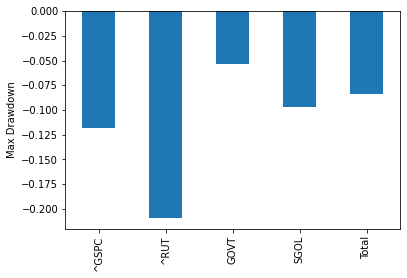

In [156]:
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()

daily_stock_returns = portfolio_test_values.pct_change()
daily_stock_returns.drop(daily_stock_returns.columns[[1,3,5,6]], axis=1, inplace=True)
daily_stock_returns = daily_stock_returns.dropna()
max_drawdowns = daily_stock_returns.apply(max_drawdown,axis=0)
max_drawdowns.plot.bar()
plt.ylabel('Max Drawdown')
max_drawdowns

## Compound Annual Growth Rate (CARG)

In [157]:
start_value = portfolio_test_values.iloc[0,:]
end_value = portfolio_test_values.iloc[-1,:]
number_of_years =  round(len(portfolio_test_values)/252)
CARG = (((end_value / start_value) ** (1/number_of_years)) -1)# Shows % of values
CARG

^GSPC    0.107693
^FTLC         NaN
^RUT    -0.093720
IEUS          NaN
GOVT    -0.044503
IGOV          NaN
SIVR          NaN
SGOL     0.056845
Total    0.008288
dtype: float64

## Calmar Ratio

^GSPC    0.968235
^RUT    -0.348238
GOVT    -0.844544
SGOL     0.669212
Total    0.162839
dtype: float64

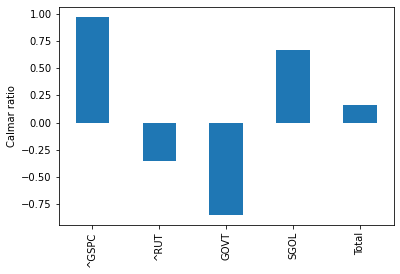

In [158]:
#daily_stock_returns = portfolio_position_values.pct_change().dropna() # Analysing holding such portfolio position from the start
daily_stock_returns = portfolio_test_values.pct_change()
daily_stock_returns.drop(daily_stock_returns.columns[[1,3,5,6]], axis=1, inplace=True)
daily_stock_returns = daily_stock_returns.dropna()
calmars = daily_stock_returns.mean()*255/abs(max_drawdowns)

calmars.plot.bar()
plt.ylabel('Calmar ratio')
calmars

## Value at Risk? Haven't decided if I want to include this or not

# Export Test Year to CSV

In [164]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [165]:
portfolio_test_values.to_csv('HiddenMarkovModelData.csv')

In [166]:
portfolio_weights.to_csv('HiddenMarkovModelWeights.csv')

In [167]:
!cp HiddenMarkovModelWeights.csv "drive/My Drive/DisData"

In [168]:
!cp HiddenMarkovModelData.csv "drive/My Drive/DisData"